### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload


# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [16]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [5]:
# Choose the experiment
experiment_choice = "n-choice"
number_of_choices = 3
# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# how many simulations do you want to run ? each simulation is executed as a seperate thread

num_sims = 1

num_cores = 7
# set a seed
import time
np.random.seed(int(time.time()))
#seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]
seed = 8867366
print(seed)


in choose pipeline
in reward pipeline
8867366


In [6]:
#Import core functions

# from frontendhelpers import * 
# from tracetype import *
# import qvalues as qval
# import generateepochs as gen
# from agentmatrixinit import *

# import pipeline_creation as pl_creat

# Import plotting functions
# import matplotlib.pyplot as plt

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [7]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
configuration = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None, # default = 600ms
    'thalamic_threshold': None, # default 30sp/s
    'movement_time':None,# #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None, #wait for a choice to be made, default 1000, 
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["A"],["B"],["C"]], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df_set':pd.DataFrame([[0.5, 0.5,0.5]],columns=["A","B","C"]), #initialized Q-values df (qvalues.py)  
    'n_trials': 1, #number of trials (generateepochs.py)
    'volatility': [None,"exact"], #frequency of changepoints and type of change points (exact or poisson) (generateepochs.py)
    'conflict': (0.7, 0.3,0.4), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # 3 instead? how much stimulus the LIP gets at maximum
    'corticostriatal_plasticity_present':True, # whether plasticity is on or "off" at corticostriatal synapses
    'record_variables':["weight"],#"optogenetic_input"],
    'opt_signal_present':False,
    'opt_signal_probability':[6,7,8,9], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude':-0.5, # ampitude of the stop signal over base line
    'opt_signal_onset':10., # in ms
    'opt_signal_duration':500.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPi"],
    'sustainedfraction':0.7
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [8]:
# pl.modulelist

In [9]:
results = cbgt.ExecutionManager(cores=num_cores).run([pl]*num_sims,[configuration]*num_sims)


SpawnThreadManagers <backend.Pipeline object at 0x7f7625e29880>
(worker pid=None) in choose pipeline
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) sum 1.4
(worker pid=None) n_prob_trials [0, 0, 0]
(worker pid=None) calc_rew      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) reward_list      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) in choose pipeline
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) conflict (0.7, 0.3, 0.4)
(worker pid=None) sum 1.4
(worker pid=None) n_prob_trials [0, 0, 0]
(worker pid=None) calc_rew      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
(worker pid=None) reward_list      A    B    C
(worker pid=None) 0  0.0  0.0  0.0
SpawnThreadManagers <backend.Pipeline object at 0x7f7625dded30>
(worker pid=None) scaling_conn 0.6666666666666666
(worker pid=None) scaling_wts 1
(worker pid=None) begin GenOptSchedule
(worker pid=None) <class 'list'>
(worker pid=No

(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:105: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:121: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) agent.opt_popids [0 1 2]
(worker pid=None) agent.opt_popids [0 1 2]
(worker pid=None) phasetimer 136
(worker pid=None) gateFRs [23.77777778 26.         30.22222222]
(worker pid=None) thresholds_crossed [2]
(worker pid=None) phasetimer 136
(worker pid=None) gateFRs [23.77777778 26.         30.22222222]
(worker pid=None) thresholds_crossed [2]
(worker pid=None) trial_num 0
(worker pid=None) chosen_action C
(worker pid=None) scaled dopamine signal -40.0
(worker pid=None) trial_num 0
(worker pid=None) chosen_action C
(worker pid=None) scaled dopamine signal -40.0


In [10]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'corticostriatal_plasticity_present', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'par', 'popconstruct', 'interface', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'opt_duration_df', 'opt_populations_df', '

In [11]:
results[0]['meaneff_GABA']

,GPi,GPi,GPi,STN,STN,STN,GPe,GPe,GPe,D1STR,...,D2STR,D2STR,Cx,Cx,Cx,Th,Th,Th,FSI,CxI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STN,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPe,0.058`,0.0`,0.0`,0.35`,0.0`,0.0`,1.75`,1.75`,1.75`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPe,0.0`,0.058`,0.0`,0.0`,0.35`,0.0`,1.75`,1.75`,1.75`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPe,0.0`,0.0`,0.058`,0.0`,0.0`,0.35`,1.75`,1.75`,1.75`,0.0`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,...,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [12]:
results[0]['conflict']

(0.7, 0.3, 0.4)

In [13]:
results[0]['Q_df']

,A,B,C
0,0.5,0.5,0.50
0,0.5,0.5,0.45


In [14]:
experiment_choice

'n-choice'

In [17]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed,experiment_choice)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [18]:
results[0]['popfreqs']

,GPi_A,GPi_B,GPi_C,STN_A,STN_B,STN_C,GPe_A,GPe_B,GPe_C,D1STR_A,...,D2STR_C,Cx_A,Cx_B,Cx_C,Th_A,Th_B,Th_C,FSI_common,CxI_common,Time (ms)
0,67.777778,65.555556,67.777778,24.711111,24.600000,27.111111,62.533333,59.733333,58.733333,3.777778,...,5.777778,0.00000,0.000000,0.000000,6.444444,11.111111,6.666667,8.444444,0.806452,0
1,67.333333,66.444444,67.555556,24.666667,24.533333,27.355556,62.244444,58.888889,59.688889,4.000000,...,5.555556,0.00000,0.000000,0.000000,6.888889,11.111111,6.222222,8.222222,0.896057,1
2,67.333333,66.444444,68.444444,24.533333,24.711111,27.400000,62.177778,58.088889,60.777778,4.000000,...,5.111111,0.00000,0.000000,0.000000,6.888889,10.888889,6.222222,8.222222,0.896057,2
3,66.222222,66.222222,68.222222,24.711111,25.000000,27.311111,61.377778,57.977778,61.688889,4.000000,...,5.333333,0.00000,0.000000,0.000000,6.666667,10.888889,6.000000,7.555556,0.896057,3
4,65.555556,66.666667,68.444444,24.733333,25.222222,26.977778,61.088889,57.755556,62.577778,4.000000,...,5.555556,0.00000,0.000000,0.000000,6.666667,10.888889,6.000000,7.555556,0.806452,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,66.666667,63.333333,70.666667,27.222222,24.511111,25.933333,56.333333,65.600000,58.955556,5.333333,...,5.555556,1.30719,1.143791,0.816993,10.444444,9.777778,7.777778,8.000000,1.254480,987
988,66.222222,61.555556,71.333333,27.000000,24.333333,25.777778,55.733333,65.888889,58.311111,5.111111,...,5.777778,1.30719,1.143791,0.735294,10.222222,9.555556,7.555556,8.222222,1.254480,988
989,66.444444,61.555556,72.000000,27.044444,24.000000,25.977778,55.111111,66.777778,58.088889,5.111111,...,5.777778,1.30719,1.143791,0.735294,10.000000,10.000000,8.000000,8.444444,1.344086,989
990,67.111111,61.777778,72.222222,27.222222,24.022222,26.155556,54.577778,67.311111,57.577778,5.111111,...,5.777778,1.30719,1.143791,0.735294,9.777778,10.222222,8.000000,8.444444,1.344086,990


In [19]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,volatility_type,conflict
0,0,GPi_A,67.777778,GPi,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
1,1,GPi_A,67.333333,GPi,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
2,2,GPi_A,67.333333,GPi,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
3,3,GPi_A,66.222222,GPi,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
4,4,GPi_A,65.555556,GPi,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
...,...,...,...,...,...,...,...,...,...,...
22811,987,CxI_common,1.254480,CxI,common,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
22812,988,CxI_common,1.254480,CxI,common,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
22813,989,CxI_common,1.344086,CxI,common,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"
22814,990,CxI_common,1.344086,CxI,common,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)"


In [20]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,0.0,100.0,C,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control


In [21]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

nuc_list ['D1-A' 'D2-A' 'D1-B' 'D2-B' 'D1-C' 'D2-C']
ind_list [[0 0 1 0 2 0]
 [0 1 1 1 2 1]]


In [22]:
recorded_variables['weight']

,weights,trials,nuclei,seed


In [23]:
# recorded_variables['optogenetic_input']

In [24]:
import seaborn as sns
import pylab as pl
sns.pointplot(x="trials",y="weights",hue="nuclei",data=recorded_variables['weight'])


ValueError: min() arg is an empty sequence

In [26]:
# pl.figure()
# sns.lineplot(x="Time(ms)",y="D1STR_left",data=recorded_variables['optogenetic_input'],hue='seed')

In [27]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility_type,conflict,condition
0,0,2,0,A,0.50,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
1,1,3,1,A,0.50,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
2,2,4,0,B,0.50,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
3,3,5,1,B,0.50,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
4,4,6,0,C,0.50,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
5,5,7,1,C,0.45,Q_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
6,0,0,0,A,0.00,reward_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
7,1,1,0,B,0.00,reward_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
8,2,2,0,C,0.00,reward_df,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control
9,0,0,0,C,0.00,chosen action,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control


In [28]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,0.0,100.0,C,A,8867366_0,1.0,None,exact,"(0.7, 0.3, 0.4)",Control


In [29]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    254
dtype: object

In [30]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,C,0,136,136,390,390,A,0.0


In [31]:
# Check the Q-values data frame
results[0]['Q_df']

,A,B,C
0,0.5,0.5,0.50
0,0.5,0.5,0.45


In [32]:
# postfix = "weak_GPi_inh"
postfix = ""

In [33]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+postfix+'_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])


In [34]:
firing_rates[0].to_csv(data_dir+"firing_rates_"+postfix+".csv")
reward_q_df[0].to_csv(data_dir+"reward_df_"+postfix+".csv")
performance.to_csv(data_dir+"performance_"+postfix+".csv")
rt_dist.to_csv(data_dir+"rt_dist_"+postfix+".csv")
total_performance.to_csv(data_dir+"total_performance_"+postfix+".csv")

In [35]:
reward_q_df

[    level_0  index  Trials variable  value      data_type       seed  \
 0         0      2       0        A   0.50           Q_df  8867366_0   
 1         1      3       1        A   0.50           Q_df  8867366_0   
 2         2      4       0        B   0.50           Q_df  8867366_0   
 3         3      5       1        B   0.50           Q_df  8867366_0   
 4         4      6       0        C   0.50           Q_df  8867366_0   
 5         5      7       1        C   0.45           Q_df  8867366_0   
 6         0      0       0        A   0.00      reward_df  8867366_0   
 7         1      1       0        B   0.00      reward_df  8867366_0   
 8         2      2       0        C   0.00      reward_df  8867366_0   
 9         0      0       0        C   0.00  chosen action  8867366_0   
 10        0      0       0        A   0.00          block  8867366_0   
 
     n_trials volatility volatility_type         conflict condition  
 0        1.0       None           exact  (0.7, 0.3,

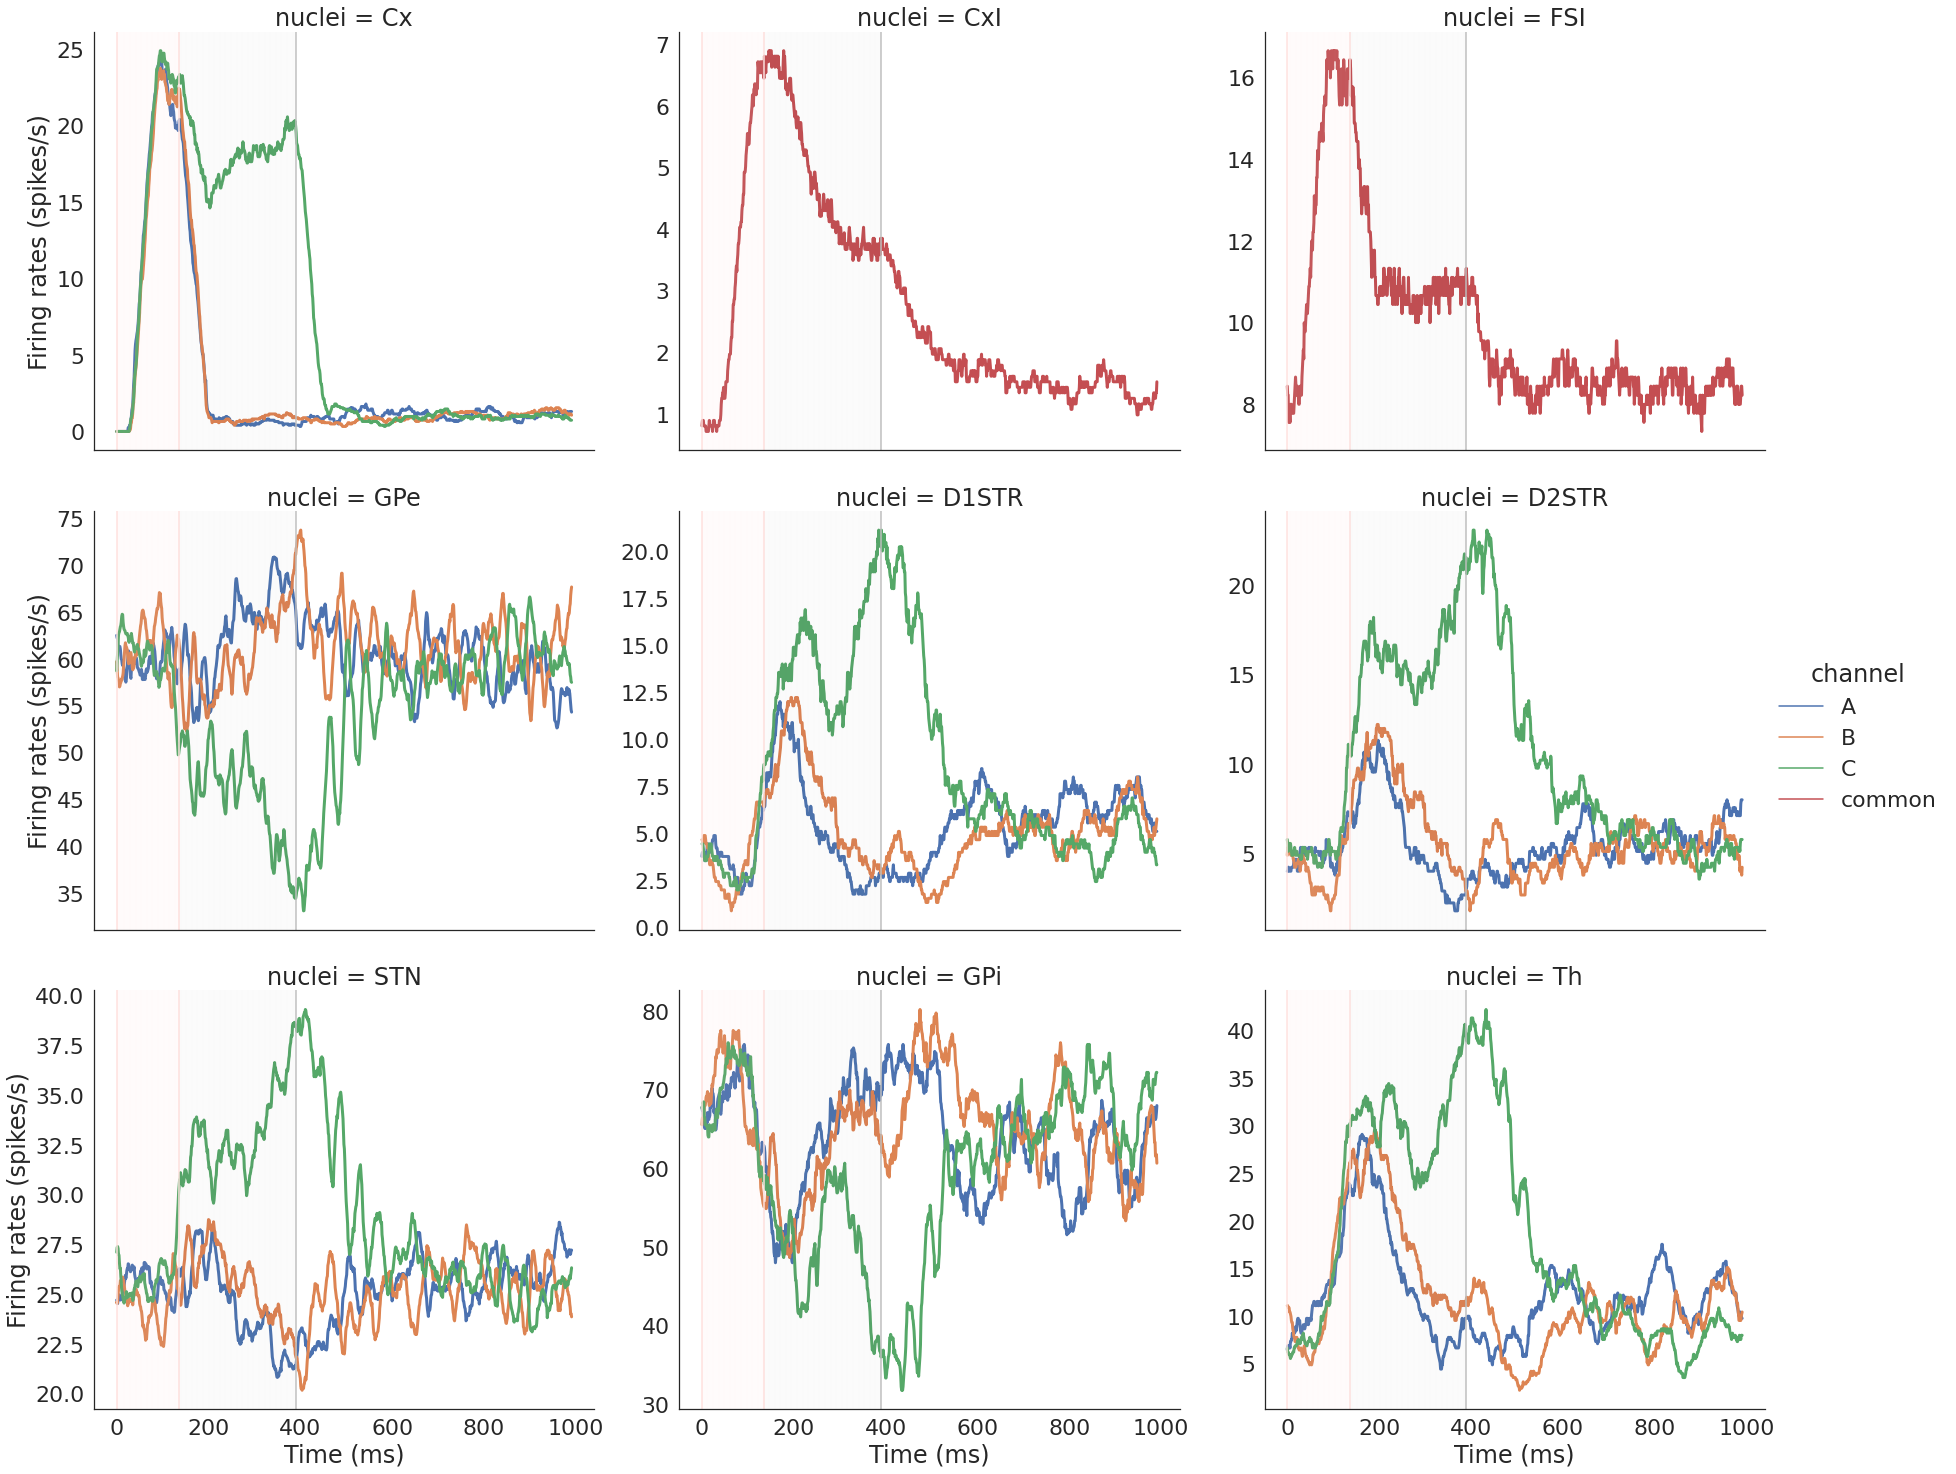

In [36]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,experiment_choice)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_"+postfix+".png",dpi=300)

In [ ]:
FR_fig_handles_zoom = plt_func.plot_fr_flex(firing_rates[0],datatables[0],['all'], [], (0, 500)) 

In [ ]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)